In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [17]:
result_reconstruction_error_df = pd.read_excel(r'/Users/tushardesai/Documents/kaggle/Creditcard/reconstruction_error_class.xlsx', index_col=0)

In [18]:
result_reconstruction_error_df.head()

,mse,actual_class
183484,0.369954,0
255448,0.156509,0
244749,0.736649,0
63919,0.570240,0
11475,0.742705,0


In [19]:
normal_data = result_reconstruction_error_df[result_reconstruction_error_df.actual_class==0]
outlier_data = result_reconstruction_error_df[result_reconstruction_error_df.actual_class==1]

In [20]:
normal_data.mse.describe()

count    28426.000000
mean         0.432512
std          7.156127
min          0.011308
25%          0.157754
50%          0.254680
75%          0.429376
max       1192.181793
Name: mse, dtype: float64

In [15]:
outlier_data.mse.describe()

count    55.000000
mean     22.201723
std      24.552852
min       0.235396
25%       4.346557
50%      11.356856
75%      25.294410
max      72.742227
Name: mse, dtype: float64

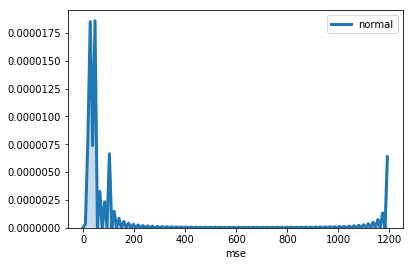

In [29]:
sns.distplot(normal_data.mse, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3},label='normal')

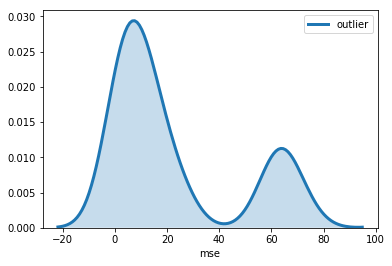

In [30]:
sns.distplot(outlier_data.mse, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='outlier')

In [47]:
def threshold_setter(threshold_val, result_df):
    result_df['predicted_class'] = np.where(result_df['mse'] >= threshold_val, 1, 0)

    tp = np.sum((result_df.predicted_class == 1) & (result_df.actual_class == 1))
    fp = np.sum((result_df.predicted_class == 1) & (result_df.actual_class == 0))
    fn = np.sum((result_df.predicted_class == 0) & (result_df.actual_class == 1))
    tn = np.sum((result_df.predicted_class == 0) & (result_df.actual_class == 0))

    precision = float(tp / (tp + fp))
    recall = float(tp / (tp + fn))
    f1_score = (2 * precision * recall) / (precision + recall)
    tpr = float(tp / (tp + fn))
    fpr = float(fp / (fp + tn))

    return {'threshold': threshold_val, 'precision': precision, 'recall': recall, 'f1': f1_score, 'TP':tp, 'FP':fp, 'FN':fn, 'TN':tn,'TPR':tpr, 'FPR':fpr}

In [59]:
threshold_values = np.linspace(0,70,1000)
threshold_score_dataframe = pd.DataFrame(columns=['threshold','precision','recall','f1','TP','FP','FN','TN','TPR','FPR'])
for threshold_num in threshold_values:
    threshold_f1 = threshold_setter(threshold_num, result_reconstruction_error_df)
    threshold_score_dataframe = threshold_score_dataframe.append(threshold_f1, ignore_index=True)
    
print(threshold_score_dataframe.head())

   threshold  precision    recall        f1    TP       FP   FN       TN  \
0    0.00000   0.001931  1.000000  0.003855  55.0  28426.0  0.0      0.0   
1    0.07007   0.001971  1.000000  0.003933  55.0  27856.0  0.0    570.0   
2    0.14014   0.002400  1.000000  0.004788  55.0  22863.0  0.0   5563.0   
3    0.21021   0.003207  1.000000  0.006394  55.0  17094.0  0.0  11332.0   
4    0.28028   0.004135  0.963636  0.008236  53.0  12763.0  2.0  15663.0   

        TPR       FPR  
0  1.000000  1.000000  
1  1.000000  0.979948  
2  1.000000  0.804299  
3  1.000000  0.601351  
4  0.963636  0.448990  


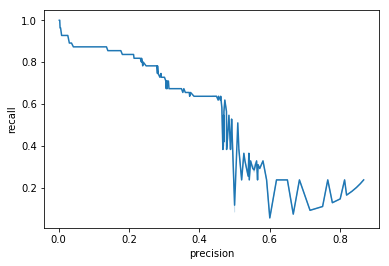

In [60]:
sns.lineplot(threshold_score_dataframe['precision'],threshold_score_dataframe['recall'])

Text(0.5,1,'ROC curve')

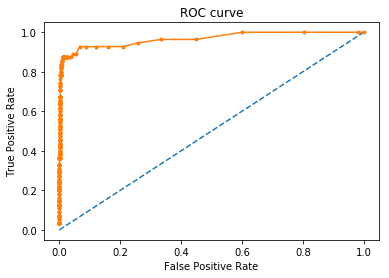

In [66]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(threshold_score_dataframe['FPR'],threshold_score_dataframe['TPR'], marker='.',)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

Text(0,0.5,'F1 Score')

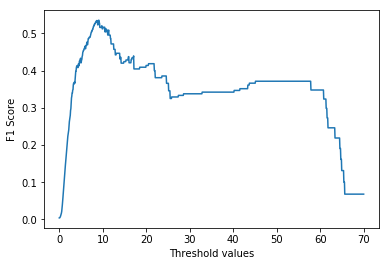

In [67]:
plt.plot(threshold_score_dataframe['threshold'], threshold_score_dataframe['f1'])
plt.xlabel('Threshold values')
plt.ylabel('F1 Score')

In [74]:
threshold_score_dataframe.iloc[threshold_score_dataframe.f1.idxmax(),:]

threshold        9.039039
precision        0.472222
recall           0.618182
f1               0.535433
TP              34.000000
FP              38.000000
FN              21.000000
TN           28388.000000
TPR              0.618182
FPR              0.001337
Name: 129, dtype: float64